In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

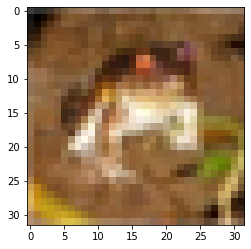

In [9]:
plt.imshow(X_train[0])

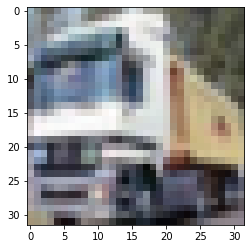

In [10]:
plt.imshow(X_train[1])

In [11]:
y_train.shape

(50000, 1)

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [14]:
y_train = y_train.reshape(-1,) #changes into one dimensional array
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [16]:
classes[0]

'airplane'

In [19]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

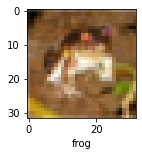

In [20]:
plot_sample(X_train,y_train,0)

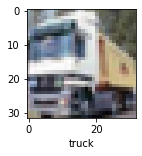

In [21]:
plot_sample(X_train,y_train,1)

In [22]:
X_train = X_train / 255
X_test = X_test / 255

# ANN

In [23]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.8104 - accuracy: 0.3574
Epoch 2/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.6228 - accuracy: 0.4264
Epoch 3/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.5440 - accuracy: 0.4542
Epoch 4/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4824 - accuracy: 0.4775
Epoch 5/5
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4342 - accuracy: 0.4943


In [24]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 9ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.56      0.53      1000
           1       0.44      0.77      0.56      1000
           2       0.39      0.24      0.30      1000
           3       0.40      0.24      0.30      1000
           4       0.42      0.44      0.43      1000
           5       0.43      0.35      0.39      1000
           6       0.40      0.68      0.50      1000
           7       0.77      0.26      0.39      1000
           8       0.50      0.69      0.58      1000
           9       0.53      0.34      0.41      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.44     10000
weighted avg       0.48      0.46      0.44     10000



# CNN

In [25]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [26]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 25s 15ms/step - loss: 1.4153 - accuracy: 0.4922
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0848 - accuracy: 0.6198
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9687 - accuracy: 0.6632
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8836 - accuracy: 0.6928
Epoch 5/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8115 - accuracy: 0.7188
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7556 - accuracy: 0.7380
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7038 - accuracy: 0.7543
Epoch 8/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6571 - accuracy: 0.7716
Epoch 9/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6117 - accuracy: 0.7865
Epoch 10/10
1563/1563 [==============================] - 31s 20m

In [28]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9445 - accuracy: 0.6921


[0.9444555640220642, 0.6920999884605408]

In [29]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 5ms/step


array([[6.3389988e-04, 2.5471103e-05, 9.0162204e-05, 9.5752549e-01,
        4.0096289e-05, 1.4690978e-02, 2.1209005e-02, 1.0270705e-05,
        5.6193634e-03, 1.5520162e-04],
       [6.6520204e-03, 3.4775469e-02, 2.0430851e-07, 1.1670055e-06,
        5.1177648e-07, 2.5926504e-08, 2.7781979e-09, 2.6038340e-09,
        9.5815909e-01, 4.1152744e-04],
       [1.6358525e-01, 2.0436171e-01, 6.4732181e-04, 2.6660571e-02,
        5.4143229e-03, 5.0278655e-03, 8.5738098e-04, 1.4949062e-04,
        3.5057038e-01, 2.4272569e-01],
       [4.9485290e-01, 3.0290304e-02, 7.6243460e-02, 1.1648667e-02,
        2.1140468e-03, 1.9809382e-05, 5.6404481e-03, 4.6060344e-05,
        3.7792832e-01, 1.2159299e-03],
       [1.7235745e-05, 1.0380259e-06, 2.0932108e-03, 1.0490507e-02,
        5.5154402e-02, 7.5207767e-04, 9.3146873e-01, 7.3063193e-06,
        1.3464020e-05, 2.0297412e-06]], dtype=float32)

TypeError: only integer scalar arrays can be converted to a scalar index

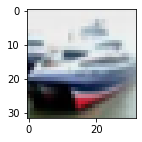

In [31]:
plot_sample(X_test, y_test,1)